# Analysis of Hotel Bookings
1. Bar graph with income
2. Graph with number of bookings/reservation status for each hotel. column or stack chart 

In [1]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)

In [2]:
hotel_data = pd.read_csv('hotel/hotel_bookings.csv')
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date                           0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

In [3]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hotel_data[hotel_data['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [5]:
hotel_data['children'] = hotel_data['children'].fillna(0)

In [6]:
hotel_data[hotel_data['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [7]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# convert month name of arrival date to number from full month name
arrival_date_month = []
for month in hotel_data['arrival_date_month']:
    month_num = list(calendar.month_name).index(month)
    arrival_date_month.append(month_num) 
hotel_data['arrival_date_month'] = arrival_date_month

# convert arrival_date_year to datetime datatype
hotel_data['arrival_date_year'] = hotel_data['arrival_date_year'].astype(str) + ('-') + hotel_data['arrival_date_month'].astype(str) + ('-') + hotel_data['arrival_date_day_of_month'].astype(str)
hotel_data['arrival_date_year'] = pd.to_datetime(hotel_data['arrival_date_year'])

# rename arrival date column
hotel_data.rename(columns = {'arrival_date_year' : 'arrival_date'}, inplace=True)
hotel_data = hotel_data.drop(columns=['arrival_date_week_number','arrival_date_month', 'arrival_date_day_of_month'])
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### What is the distribution of adr for the hotels

In [9]:
data_wo = hotel_data.drop(hotel_data[hotel_data['adr'] > 5000].index)

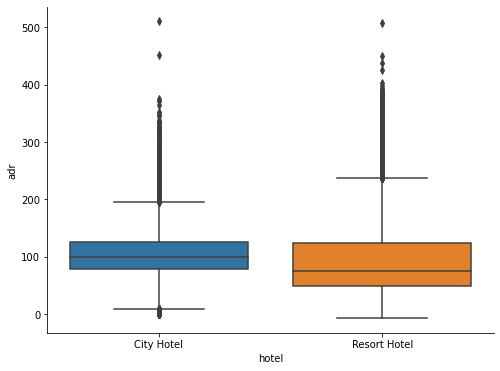

In [10]:
plt.figure(figsize=(8,6), frameon=False)

ax = sns.boxplot(data=data_wo, x='hotel', y='adr', order = ['City Hotel', 'Resort Hotel']);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

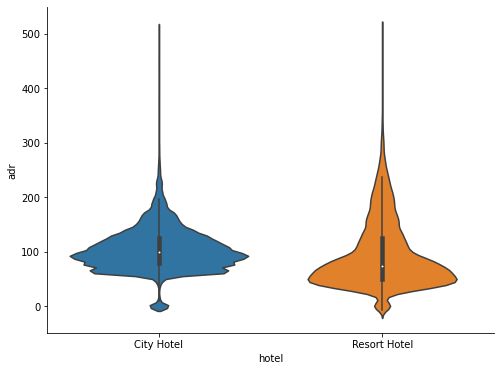

In [11]:
plt.figure(figsize=(8,6), frameon=False)
ax = sns.violinplot(data=data_wo, x='hotel', y='adr', order=['City Hotel', 'Resort Hotel']);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [12]:
canceled_data = hotel_data[hotel_data['is_canceled'] == 1]
canceled_data[canceled_data['adr'] > 0.0]

,hotel,is_canceled,lead_time,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015-07-01,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015-07-01,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015-07-01,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015-07-01,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015-07-01,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,City Hotel,1,25,2017-05-06,2,1,1,0.0,0,BB,FRA,Corporate,Corporate,1,0,1,E,F,0,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,2017-05-06
111355,City Hotel,1,4,2017-06-05,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017-05-31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017-07-17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


- there are cancelled booking that generated adr even though the booking was without deposit so where did the transaction come from.
- all no shows should not generate adr

In [13]:
noshow_data = hotel_data[hotel_data['reservation_status'] == 'No-Show']
noshow_data[noshow_data['adr'] > 0.0]

,hotel,is_canceled,lead_time,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
122,Resort Hotel,1,36,2015-07-04,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,G,1,No Deposit,250.0,NaN,0,Transient,123.00,0,0,No-Show,2015-07-04
328,Resort Hotel,1,55,2015-07-12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12
343,Resort Hotel,1,47,2015-07-12,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,241.0,NaN,0,Transient,103.80,0,0,No-Show,2015-07-12
467,Resort Hotel,1,6,2015-07-17,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,C,0,No Deposit,241.0,NaN,0,Transient,110.50,0,1,No-Show,2015-07-17
472,Resort Hotel,1,3,2015-07-17,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,5.0,NaN,0,Transient,107.60,0,0,No-Show,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97968,City Hotel,1,0,2016-10-10,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,D,0,No Deposit,NaN,329.0,0,Transient,153.00,0,0,No-Show,2016-10-10
108459,City Hotel,1,31,2017-07-16,2,0,1,0.0,0,BB,USA,Direct,Direct,1,0,2,A,A,1,No Deposit,NaN,NaN,0,Transient,135.00,0,2,No-Show,2017-07-16
108829,City Hotel,1,25,2017-05-06,2,1,1,0.0,0,BB,FRA,Corporate,Corporate,1,0,1,E,F,0,No Deposit,NaN,450.0,0,Transient,125.00,0,0,No-Show,2017-05-06
111925,City Hotel,1,6,2017-07-17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.00,0,0,No-Show,2017-07-17


### Count of Bookings by reservation status for each hotel

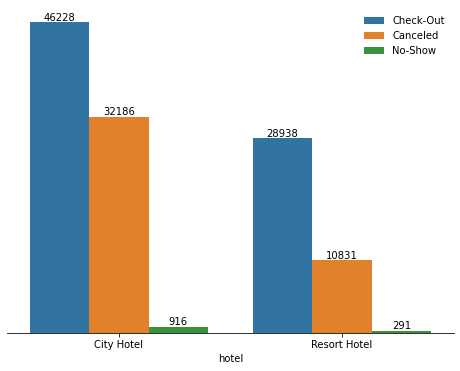

In [14]:
plt.figure(figsize=(8,6))

ax = sns.countplot(data=hotel_data, x='hotel', hue='reservation_status', order=['City Hotel', 'Resort Hotel'])
for container in ax.containers:
    ax.bar_label(container)
ax.axes.get_yaxis().set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(frameon=False)
plt.show()